# Setup 

In [0]:
!pip install rasterio

     |████████████████████████████████| 19.7MB 2.7MB/s 


In [0]:
!pip install git+https://github.com/usgs/geomag-algorithms.git

  Cloning https://github.com/usgs/geomag-algorithms.git to /tmp/pip-req-build-kcj0ip19
  Running command git clone -q https://github.com/usgs/geomag-algorithms.git /tmp/pip-req-build-kcj0ip19
     |████████████████████████████████| 23.9MB 2.7MB/s 
     |████████████████████████████████| 215kB 39.7MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-ud3bmxn7/wheels/dc/8b/cb/0141ac2aa76db65e2037c96bf61b63c26a64a1eb4ddb6f7eeb
  Stored in directory: /root/.cache/pip/wheels/11/d6/40/c448464ae42229b2f9fb46b71be0213e10e9628346b7f1198f
  Stored in directory: /root/.cache/pip/wheels/d2/85/ae/ebf5ff0f1368869d082b4863df492bf54c661bf6306a2bdfde
Successfully built geomag-algorithms obspy pycurl


In [0]:
!pip install git+https://github.com/samiriff/scikit-dataaccess-ode.git --upgrade

  Cloning https://github.com/samiriff/scikit-dataaccess-ode.git to /tmp/pip-req-build-qa1no5jc
  Running command git clone -q https://github.com/samiriff/scikit-dataaccess-ode.git /tmp/pip-req-build-qa1no5jc
     |████████████████████████████████| 4.1MB 2.8MB/s 
     |████████████████████████████████| 11.2MB 30.7MB/s 
     |████████████████████████████████| 307kB 43.6MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-hj36sc42/wheels/94/32/44/d60e0ce15a9593baec955d92a45977ccf9869316c9e698efa7
Successfully built scikit-dataaccess


# Using Scikit-Dataaccess to fetch data based on some criteria

In [0]:
from skdaccess.framework.data_class import DataFetcherCache, ImageWrapper
from skdaccess.utilities.ode_util import *

In [0]:
def query_files_urls(target, mission, instrument, product_type,
                     western_lon, eastern_lon, min_lat, max_lat,
                     min_ob_time, max_ob_time, product_id, file_name,
                     number_product_limit, result_offset_number):    
    # Returns a list of products with selected product metadata that meet the query parameters
    query_type = 'product'
    # Controls the return format for product queries or error messages
    output = 'XML'
    # For each product found return the product files and IDS
    results = 'fp'

    query_url = get_query_url(target, mission, instrument, product_type,
                              western_lon, eastern_lon, min_lat, max_lat,
                              min_ob_time, max_ob_time, product_id,
                              query_type, output, results,
                              number_product_limit, result_offset_number)
                
    print('Query URL:', query_url)
    print('\nFiles that will be downloaded (if not previously downloaded):')
    file_urls = get_files_urls(query_url, file_name, print_info = False)    
    return file_urls

## Query Parameters

In [0]:
target = 'mars'                    # Aimed planetary body, i.e., Mars, Mercury, Moon, Phobos, or Venus
mission = 'MRO'                    # Aimed mission, e.g., MGS or MRO                
instrument = 'HIRISE'              # Aimed instrument from the mission, e.g., HIRISE or CRISM
product_type = 'RDRV11'            # Type of product to look for, e.g., DTM or RDRV11
western_lon = 55.18                # Western longitude to look for the data, from 0 to 360
eastern_lon = 55.31                # Eastern longitude to look for the data, from 0 to 360
min_lat = -26.9                    # Minimal latitude to look for the data, from -90 to 90
max_lat = -26.66                   # Maximal latitude to look for the data, from -90 to 90
product_id = '*029815*1530*COLOR*' # PDS Product Id to look for, with wildcards (*) allowed
min_ob_time = ''                   # Minimal observation time in (even partial) UTC format, e.g., '2017-03-01'
max_ob_time = ''                   # Maximal observation time in (even partial) UTC format, e.g., '2017-03-01'
file_name = '*COLOR.JP2'           # File name to look for, with wildcards (*) allowed
number_product_limit = 10          # Maximal number of products to return (100 at most)
result_offset_number = 0           # Offset the return products, to go beyond the limit of 100 returned products
remove_ndv = True                  # Replace the no-data value as mentionned in the label by np.nan

In [0]:
query_results = query_files_urls(target, mission, instrument, product_type,
                                     western_lon, eastern_lon, min_lat, max_lat,
                                     min_ob_time, max_ob_time, product_id, file_name,
                                     number_product_limit, result_offset_number)
print("Number of Files found =", len(query_results.keys()))
query_results

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mars&ihid=MRO&iid=HIRISE&pt=RDRV11&westernlon=55.18&easternlon=55.31&minlat=-26.9&maxlat=-26.66&query=product&results=fp&output=XML&limit=10&offset=0&productid=*029815*1530*COLOR*

Files that will be downloaded (if not previously downloaded):
Number of Files found = 1


OrderedDict([('http://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB_029800_029899/ESP_029815_1530/ESP_029815_1530_COLOR.JP2',
              ('ESP_029815_1530_COLOR', 'PRODUCT DATA FILE'))])

## Download JP2 files 

In [0]:
for query_result in query_results.keys():
  print("Downloading", query_result)
  !wget {query_result}

--2019-06-09 12:54:31--  http://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB_029800_029899/ESP_029815_1530/ESP_029815_1530_COLOR.JP2
Resolving hirise.lpl.arizona.edu (hirise.lpl.arizona.edu)... 128.196.250.179, 2607:f088:0:2::2a
Connecting to hirise.lpl.arizona.edu (hirise.lpl.arizona.edu)|128.196.250.179|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB_029800_029899/ESP_029815_1530/ESP_029815_1530_COLOR.JP2 [following]
--2019-06-09 12:54:31--  https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB_029800_029899/ESP_029815_1530/ESP_029815_1530_COLOR.JP2
Connecting to hirise.lpl.arizona.edu (hirise.lpl.arizona.edu)|128.196.250.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130757679 (125M) [image/jp2]
Saving to: ‘ESP_029815_1530_COLOR.JP2’

ESP_029815_1530_COL 100%[===================>] 124.70M  27.8MB/s    in 4.8s    

2019-06-09 12:54:36 (25.8 MB/s) - ‘ESP_029815_1530_COLOR.JP2’ sa

# Import Required Packages

In [0]:
from tqdm import tqdm_notebook as tqdm
import numpy as np
import rasterio
import os
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from numpy.lib.stride_tricks import as_strided
from warnings import warn

# Convert JP2 Image into Chunks

## Define Function to slice out multiple 2-D blocks(arrays) from a 2-D array
- Slices out arrays of size (`block_shape, block_shape`) from an array of size (`x, y`)
- Note that you will get an error if either x or y are not perfectly divisible by block_shape

In [0]:
# Based on https://stackoverflow.com/questions/8070349/using-numpy-stride-tricks-to-get-non-overlapping-array-blocks/28207538#28207538 

def view_as_blocks(arr_in, block_shape):
    """Block view of the input n-dimensional array (using re-striding).
    Blocks are non-overlapping views of the input array.
    Parameters
    ----------
    arr_in : ndarray
        N-d input array.
    block_shape : tuple
        The shape of the block. Each dimension must divide evenly into the
        corresponding dimensions of `arr_in`.
    Returns
    -------
    arr_out : ndarray
        Block view of the input array.  If `arr_in` is non-contiguous, a copy
        is made.
    Examples
    --------
    >>> import numpy as np
    >>> from skimage.util.shape import view_as_blocks
    >>> A = np.arange(4*4).reshape(4,4)
    >>> A
    array([[ 0,  1,  2,  3],
           [ 4,  5,  6,  7],
           [ 8,  9, 10, 11],
           [12, 13, 14, 15]])
    >>> B = view_as_blocks(A, block_shape=(2, 2))
    >>> B[0, 0]
    array([[0, 1],
           [4, 5]])
    >>> B[0, 1]
    array([[2, 3],
           [6, 7]])
    >>> B[1, 0, 1, 1]
    13
    >>> A = np.arange(4*4*6).reshape(4,4,6)
    >>> A  # doctest: +NORMALIZE_WHITESPACE
    array([[[ 0,  1,  2,  3,  4,  5],
            [ 6,  7,  8,  9, 10, 11],
            [12, 13, 14, 15, 16, 17],
            [18, 19, 20, 21, 22, 23]],
           [[24, 25, 26, 27, 28, 29],
            [30, 31, 32, 33, 34, 35],
            [36, 37, 38, 39, 40, 41],
            [42, 43, 44, 45, 46, 47]],
           [[48, 49, 50, 51, 52, 53],
            [54, 55, 56, 57, 58, 59],
            [60, 61, 62, 63, 64, 65],
            [66, 67, 68, 69, 70, 71]],
           [[72, 73, 74, 75, 76, 77],
            [78, 79, 80, 81, 82, 83],
            [84, 85, 86, 87, 88, 89],
            [90, 91, 92, 93, 94, 95]]])
    >>> B = view_as_blocks(A, block_shape=(1, 2, 2))
    >>> B.shape
    (4, 2, 3, 1, 2, 2)
    >>> B[2:, 0, 2]  # doctest: +NORMALIZE_WHITESPACE
    array([[[[52, 53],
             [58, 59]]],
           [[[76, 77],
             [82, 83]]]])
    """
    if not isinstance(block_shape, tuple):
        raise TypeError('block needs to be a tuple')

    block_shape = np.array(block_shape)
    if (block_shape <= 0).any():
        raise ValueError("'block_shape' elements must be strictly positive")

    if block_shape.size != arr_in.ndim:
        raise ValueError("'block_shape' must have the same length "
                         "as 'arr_in.shape'")

    arr_shape = np.array(arr_in.shape)
    if (arr_shape % block_shape).sum() != 0:
        raise ValueError("'block_shape' is not compatible with 'arr_in'")

    # -- restride the array to build the block view

    if not arr_in.flags.contiguous:
        warn(RuntimeWarning("Cannot provide views on a non-contiguous input "
                            "array without copying."))

    arr_in = np.ascontiguousarray(arr_in)

    new_shape = tuple(arr_shape // block_shape) + tuple(block_shape)
    new_strides = tuple(arr_in.strides * block_shape) + arr_in.strides

    arr_out = as_strided(arr_in, shape=new_shape, strides=new_strides)

    return arr_out

## Create directory in which (`block_shape x block_shape`) image chunks will be saved

In [0]:
SAVE_DIR = 'chunks'
!mkdir {SAVE_DIR}

In [0]:
def is_black(img):
  width, height = img.shape
  for row in (20, height - 1):
    if (img[row][0] == 0):
      return True
    if (img[row][width - 20] == 0):
      return True
  
  for col in (20, width - 1):
    if (img[0][col] == 0):
      return True
    if (img[height - 20][col] == 0):
      return True
    
  return False

In [0]:
def write_result_blocks(result_blocks, window, save_dir='test', skip_black=False):
  for i in range(result_blocks.shape[0]):
    for j in range(result_blocks.shape[1]):
      if not skip_black or not is_black(result_blocks[i][j]):
        mpimg.imsave('./' + save_dir + '/' + "img_row_{}_col_{}_w_{}_h_{}_x_{}_y_{}.jpg".format(
            window.row_off, window.col_off, window.width, window.height, i, j), result_blocks[i][j], cmap="gray")

## Function to convert a large JP2 image into multiple smaller JPG images
- Use Rasterio's sliding window technique to read JP2 image in blocks of `1024 x 1024`into memory
- Split each `1024 x 1024` block into chunks of size `chunk_size x chunk_size` .
- Note that blocks at the corners of the JP2 image might be lesser than 1024 pixels in width or height. I skip such blocks since they will cause an error while slicing into chunks
- TODO: Note that the output consists only of grayscale chunks. I am unable to figure out how to slice a 3-D array

In [0]:
# Based on the idea provided here - https://gis.stackexchange.com/questions/158527/reading-raster-files-by-block-with-rasterio
def chunkify(img_file, chunk_size=256, save_dir='test'):
  with rasterio.open(img_file) as src:
    print('Resolution =', src.width, 'x', src.height)
    print('Estimated number of iterations =', (src.width * src.height) / (1024 * 1024))
    
    for block_index, window in tqdm(src.block_windows(1)):
      block_array = src.read(window=window)
      # print('Block array', block_array.shape)
      
      block_array = np.moveaxis(block_array, 0, -1)
      # print('Move axis', block_array.shape)
      
      block_array = cv2.cvtColor(block_array, cv2.COLOR_RGB2GRAY)
      block_array_shape = block_array.shape
      
      # plt.imshow(block_array, cmap='gray')      
      # print('Grayscale Block Shape', block_array_shape)

      if (block_array_shape[0] % chunk_size == 0 and block_array_shape[1] % chunk_size == 0):
        result_blocks = view_as_blocks(block_array, block_shape=(chunk_size, chunk_size))
        write_result_blocks(result_blocks, window, save_dir, True)

In [0]:
JP2_FILENAME = 'ESP_029815_1530_COLOR.JP2'
CHUNK_SIZE = 512 
chunkify(JP2_FILENAME, CHUNK_SIZE, SAVE_DIR)

Resolution = 5833 x 32231
Estimated number of iterations = 179.29403591156006


## Total Number of Chunks

In [0]:
len([name for name in os.listdir(SAVE_DIR) if os.path.isfile(SAVE_DIR + '/' + name)])

210

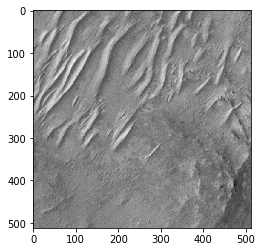

In [0]:
plt.imshow(mpimg.imread(f'./{SAVE_DIR}/img_row_11264_col_1024_w_1024_h_1024_x_0_y_1.jpg'))